In [1]:
!python3 /home2/llmhackathon25/bg_llm/src/data/parse_vasp_json.py /home2/llmhackathon25/data/train_final_raw -o /home2/llmhackathon25/data/train_final_processed/train.jsonl

[SCAN] /home2/llmhackathon25/data/train_final_raw contains ['README.rtf']
[SCAN] /home2/llmhackathon25/data/train_final_raw/other contains ['.DS_Store']
[SCAN] /home2/llmhackathon25/data/train_final_raw/other/mace-individual-atom-relax contains ['.DS_Store', 'job']
[SCAN] /home2/llmhackathon25/data/train_final_raw/other/mace-individual-atom-relax/hse_19 contains ['.DS_Store', 'job']
[SCAN] /home2/llmhackathon25/data/train_final_raw/other/mace-individual-atom-relax/hse_19/Mg contains ['POTCAR', 'INCAR', 'KPOINTS', 'job', 'POSCAR', 'vasprun.xml.gz', 'OUTCAR.gz', 'CONTCAR']
[SCAN] /home2/llmhackathon25/data/train_final_raw/other/mace-individual-atom-relax/hse_19/Te contains ['POTCAR', 'INCAR', 'KPOINTS', 'job', 'POSCAR', 'vasprun.xml.gz', 'OUTCAR.gz', 'CONTCAR']
[SCAN] /home2/llmhackathon25/data/train_final_raw/other/mace-individual-atom-relax/hse_19/S contains ['vasprun.xml_08_38_16on11_08_25.gz', 'POSCAR_08_38_16on11_08_25', 'INCAR_08_38_16on11_08_25', 'POTCAR', 'INCAR', 'KPOINTS', 'job

In [1]:
!python3 /home2/llmhackathon25/bg_llm/src/data/parse_vasp_json.py /home2/llmhackathon25/data/test_final -o /home2/llmhackathon25/data/test_final/test.jsonl

[SCAN] /home2/llmhackathon25/data/test_final contains ['test.jsonl']
[SCAN] /home2/llmhackathon25/data/test_final/PbS contains ['vasprun.xml', 'INCAR', 'POSCAR', 'CONTCAR', 'vasprun.xml_09_41_24on29_09_23.gz']
[SCAN] /home2/llmhackathon25/data/test_final/PbTe_hybrid_test contains ['.DS_Store']
[SCAN] /home2/llmhackathon25/data/test_final/PbTe_hybrid_test/ncl_23 contains ['POTCAR', 'INCAR', 'KPOINTS', 'job', 'POSCAR', 'vasprun.xml.gz', 'OUTCAR.gz', 'CONTCAR']
[SCAN] /home2/llmhackathon25/data/test_final/PbTe_hybrid_test/ncl_15 contains ['POTCAR', 'INCAR', 'KPOINTS', 'job', 'POSCAR', 'vasprun.xml.gz', 'OUTCAR.gz', 'CONTCAR']
[SCAN] /home2/llmhackathon25/data/test_final/PbTe_hybrid_test/ncl_21 contains ['POTCAR', 'INCAR', 'KPOINTS', 'job', 'POSCAR', 'vasprun.xml.gz', 'OUTCAR.gz', 'CONTCAR']
[SCAN] /home2/llmhackathon25/data/test_final/PbTe_hybrid_test/ncl_25 contains ['POTCAR', 'INCAR', 'KPOINTS', 'job', 'POSCAR', 'vasprun.xml.gz', 'OUTCAR.gz', 'CONTCAR']
[SCAN] /home2/llmhackathon25/data

In [1]:
!python /home2/llmhackathon25/bg_llm/src/data/rag_index_build.py /home2/llmhackathon25/data/train_final_processed/train.jsonl /home2/llmhackathon25/data/train_final_processed/rag.index

[build_index] processed=100 indexed=100 failed=0
[build_index] processed=200 indexed=200 failed=0
[build_index] processed=300 indexed=300 failed=0
[build_index] DONE -> /home2/llmhackathon25/data/train_final_processed/rag.index (+ .meta.json, .soap.json). Indexed=372, failed=0, dim=127764


In [1]:
!python /home2/llmhackathon25/bg_llm/scripts/train.py \
    --jsonl /home2/llmhackathon25/data/train_final_processed/train.jsonl \
    --index_path /home2/llmhackathon25/data/train_final_processed/rag.index \
    --epochs 501 \
    --lr 1e-3 \
    --batch_size 4 \
    --device cuda \
    --patience 100 \
    --val_frac 0.1 \
    --k_neighbors 5 \
    --ckpt_best_path /home2/llmhackathon25/chkpt_test/bg_llm_best_final_n256.pt \
    --ckpt_last_path /home2/llmhackathon25/chkpt_test/bg_llm_last_final_n256.pt \
    --log_json_path /home2/llmhackathon25/chkpt_test/bg_llm_log_final_n256.json \
    --seed 42


/home/charles/miniconda3/envs/bg-llm/lib/python3.11/site-packages/sentence_transformers/SentenceTransformer.py:99: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v3 of SentenceTransformers.
  warnings.warn(
Epoch 001 | train MSE=2.955759 | train MAE=1.200200 | val MSE=0.390925 | val MAE=0.430476
[checkpoint] saved BEST -> /home2/llmhackathon25/chkpt_test/bg_llm_best_final_n256.pt (metric=0.390925)
Epoch 002 | train MSE=0.814257 | train MAE=0.645144 | val MSE=0.256333 | val MAE=0.413992
[checkpoint] saved BEST -> /home2/llmhackathon25/chkpt_test/bg_llm_best_final_n256.pt (metric=0.256333)
Epoch 003 | train MSE=0.571593 | train MAE=0.524731 | val MSE=1.071857 | val MAE=0.716032
Epoch 004 | train MSE=0.559493 | train MAE=0.529287 | val MSE=0.197008 | val MAE=0.335654
[checkpoint] saved BEST -> /home2/llmhackathon25/chkpt_test/bg_llm_best_final_n256.pt (metric=0.197008)
Epoch 005 | train MSE=0.614210 | train MAE=0.546213 | val MSE=0.304719 | val MAE=0.418

In [1]:
!python /home2/llmhackathon25/bg_llm/scripts/train.py \
    --jsonl /home2/llmhackathon25/data/train_final_processed/train.jsonl \
    --index_path /home2/llmhackathon25/data/train_final_processed/rag.index \
    --epochs 501 \
    --lr 1e-3 \
    --batch_size 4 \
    --device cuda \
    --patience 100 \
    --val_frac 0.1 \
    --k_neighbors 3 \
    --ckpt_best_path /home2/llmhackathon25/chkpt_test/bg_llm_best_final_n256_kn3.pt \
    --ckpt_last_path /home2/llmhackathon25/chkpt_test/bg_llm_last_final_n256_kn3.pt \
    --log_json_path /home2/llmhackathon25/chkpt_test/bg_llm_log_final_n256_kn3.json \
    --seed 42

/home/charles/miniconda3/envs/bg-llm/lib/python3.11/site-packages/sentence_transformers/SentenceTransformer.py:99: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v3 of SentenceTransformers.
  warnings.warn(
Epoch 001 | train MSE=2.706639 | train MAE=1.128366 | val MSE=0.274392 | val MAE=0.389142
[checkpoint] saved BEST -> /home2/llmhackathon25/chkpt_test/bg_llm_best_final_n256_kn3.pt (metric=0.274392)
Epoch 002 | train MSE=0.514881 | train MAE=0.495054 | val MSE=0.290893 | val MAE=0.403371
Epoch 003 | train MSE=0.385250 | train MAE=0.421291 | val MSE=0.211824 | val MAE=0.358120
[checkpoint] saved BEST -> /home2/llmhackathon25/chkpt_test/bg_llm_best_final_n256_kn3.pt (metric=0.211824)
Epoch 004 | train MSE=0.517070 | train MAE=0.466366 | val MSE=0.147819 | val MAE=0.334188
[checkpoint] saved BEST -> /home2/llmhackathon25/chkpt_test/bg_llm_best_final_n256_kn3.pt (metric=0.147819)
Epoch 005 | train MSE=0.317917 | train MAE=0.399477 | val MSE=0.109340 | v

In [1]:
!python /home2/llmhackathon25/bg_llm/scripts/batch_predict.py \
  --input /home2/llmhackathon25/data/test_final/test.jsonl \
  --output /home2/llmhackathon25/data/test_final/test_with_predictions_n256_kn5.jsonl \
  --checkpoint /home2/llmhackathon25/chkpt_test/bg_llm_best_final_n256.pt \
  --rag-index /home2/llmhackathon25/data/train_final_processed/rag.index \
  --device cuda \
  --k 3

/home/charles/miniconda3/envs/bg-llm/lib/python3.11/site-packages/sentence_transformers/SentenceTransformer.py:99: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v3 of SentenceTransformers.
  warnings.warn(
[INFO] processed 50 (ok=50, fail=0)
[DONE] wrote 63 results to /home2/llmhackathon25/data/test_final/test_with_predictions_n256_kn5.jsonl (failures: 0)


In [2]:
import json
dft_bgs = []
pred_bgs = []
count = 0
with open('/home2/llmhackathon25/data/test_final/test_with_predictions_n256_kn5.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        neighbors = data.get("neighbors")
        try:
            if neighbors[0].get("similarity") > 0.25:
                dft_bgs.append(data.get("bandgap_eV", 0))
                pred_bgs.append(data.get("predicted_bandgap_eV", 0))
                count += 1
        except:
            pass

        #print(data.get("similarity_scores"))
        #dft_bgs.append(data.get("bandgap_eV", 0))
        #pred_bgs.append(data.get("predicted_bandgap_eV", 0))
print(f"Count: {count}")

Count: 57


R2 value: 0.8479933757518847


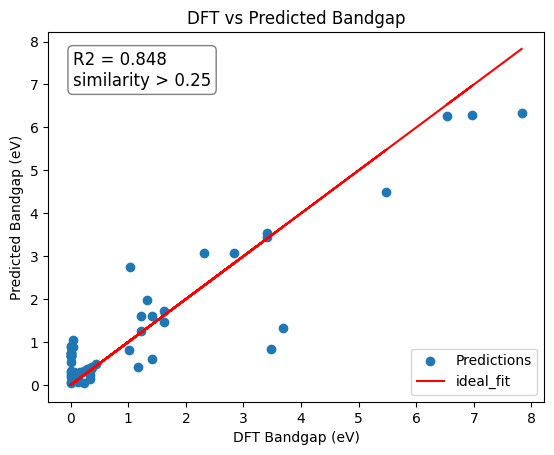

In [4]:
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
r2 = r2_score(dft_bgs, pred_bgs)
print("R2 value:", r2)
plt.scatter(dft_bgs, pred_bgs, label='Predictions')
plt.plot(dft_bgs, dft_bgs, label='ideal_fit', color='red')
plt.xlabel("DFT Bandgap (eV)")
plt.ylabel("Predicted Bandgap (eV)")
plt.title("DFT vs Predicted Bandgap")
plt.legend()
plt.text(
    0.05, 0.95,
    f"R2 = {r2:.3f}\nsimilarity > 0.25",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray")
)

plt.show()

R2 value: 0.8051284446847553


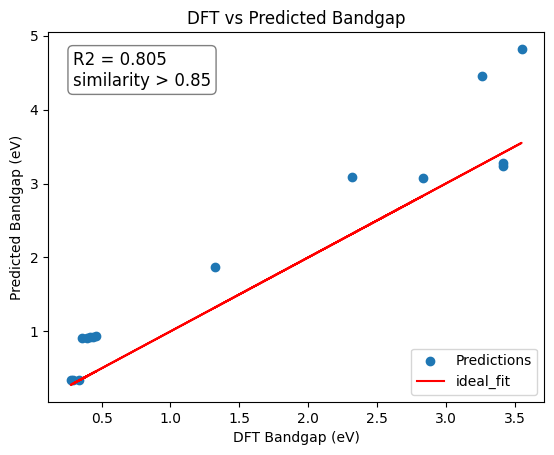

In [2]:
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
r2 = r2_score(dft_bgs, pred_bgs)
print("R2 value:", r2)
plt.scatter(dft_bgs, pred_bgs, label='Predictions')
plt.plot(dft_bgs, dft_bgs, label='ideal_fit', color='red')
plt.xlabel("DFT Bandgap (eV)")
plt.ylabel("Predicted Bandgap (eV)")
plt.title("DFT vs Predicted Bandgap")
plt.legend()
plt.text(
    0.05, 0.95,
    f"R2 = {r2:.3f}\nsimilarity > 0.85",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray")
)

plt.show()